In [ ]:
from IPython.display import HTML

# Toggle button and custom styling
display(HTML('''
<script>
    const toggleCode = () => {
        const selectors = ['.jp-InputArea', '.input', '.code_cell .input'];
        selectors.forEach(sel => {
            document.querySelectorAll(sel).forEach(el => {
                el.style.display = el.style.display === 'none' ? '' : 'none';
            });
        });
    };
</script>
<button onclick="toggleCode()" class="btn btn-default">Toggle Code Cells</button>
<style>
    .container { width: 95% !important; }
</style>
'''))

# Load custom CSS
try:
    with open('custom.css', 'r') as f:
        display(HTML(f'<style>{f.read()}</style>'))
except FileNotFoundError:
    pass

In [ ]:
from IPython.display import HTML

# Toggle button and custom styling
display(HTML('''
<script>
    const toggleCode = () => {
        const selectors = ['.jp-InputArea', '.input', '.code_cell .input'];
        selectors.forEach(sel => {
            document.querySelectorAll(sel).forEach(el => {
                el.style.display = el.style.display === 'none' ? '' : 'none';
            });
        });
    };
</script>
<button onclick="toggleCode()" class="btn btn-default">Toggle Code Cells</button>
<style>
</style>
'''))

# Load custom CSS
try:
        display(HTML(f'<style>{f.read()}</style>'))
except FileNotFoundError:
    pass

In [ ]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
                    <a href="https://inspirehep.net/authors/1262635">Dr. Ivan Polyokov</a><br>
                    <a href="https://research.manchester.ac.uk/en/persons/patrick.parkinson">Dr. Patrick Parkinson</a>
                </div>
    </div>
</div>

# Chapter 11

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. Limit setting
11. **Introduction to multivariate analysis techniques**

## Topics

**[11 Multi-variate analyses](#11-Multi-variate-analyses)**

**[11.1 Introduction](#11.1-Introduction)**

**[11.2 Receiver-Operating Characteristic curve](#11.2-Receiver-Operating-Characteristic-curve)**

**[11.3 Cross-validation](#11.3-Cross-validation)**

**[11.4 Multi-variate classification techniques](#11.4-Multi-variate-classification-techniques)**
- [11.4.1 k-Nearest Neighbour Classifier](#11.4.1-k-Nearest-Neighbour-Classifier)
- [11.4.2 Artificial Neural Networks](#11.4.2-Artificial-Neural-Networks)
- [11.4.3 (Boosted) Decision Trees](#11.4.3-(Boosted)-Decision-Trees)

## 11 Multi-variate analyses


### 11.1 Introduction

This part of the lecture follows chapter 5 of Behnke, written by Helge Voss. Some of the code examples are taken from [lectures.scientific-python.org](https://lectures.scientific-python.org/), which is a rich resource of examples with decent explanation in all aspects of scientific python from simple maths to machine learning.

The topic can easily fill a whole lecture course; hence, we have to be rather selective and to some extent superficial here.

There are two topics that are covered by multi-variate analyses: classification and regression. We will concentrate here on the former.

Classification covers the distinction of two or more classes of items in those of interest and those that are not.

The term multi-variate refers to the fact that we consider the information from several variables of interest, often called _features_ in this context, rather than just analysing a single observable. The multi-variate analysis then transforms this set of variables into a single output variable. Let us call the input set ${\bf x}=\{x_1,\ldots,x_D\}$, also referred to as the _feature vector_, and correspondingly the output $y({\bf x})$.

You can think back to the Martian rock classification as an example. There, we discussed the classification based on a single oxide concentration. Within the context of this chapter, we can extend this to the joint analysis of all measured concentrations.

#### 11.1.1 Linking classification to previous topics

Classification can be interpreted as a hypothesis test. In this case the null hypothesis, $H_0$, is that the item to classify is not of interest. Depending on the value of the test statistic $y({\bf x})$ we then reject this hypothesis or not.

The performance of a multi-variate classifier is assessed by the rate of Type I and II errors, i.e. how often items are wrongly declared to be of interest (Type I error) or how often items are wrongly found to be not of interest (Type II error). As before the trade-off between these two rates depends on the application in question.

Let us call the items of interest signal ($S$) and those not of interest background ($B$). Their distinction is then linked to the test statistic exceeding a critical value in which case we accept the outcome as signal:

$$y({\bf x})>c.$$

We can consequently define a critical region $C$ in parameter space where this equation is satisfied. With this, the rate of Type I errors or the significance is

$$\alpha=\int_C p({\bf X}|H_0)d{\bf x} = \int_C p({\bf X}|B)d{\bf x} = \int_{y({\bf x})>c}p({\bf X}|B)d{\bf x}.$$

This also defines the rate of Type II errors as

$$\beta=\int_{y({\bf x})<c}p({\bf X}|S)d{\bf x}.$$

In this context, we can also identify $1-\beta$, which is usually called power, as the signal efficiency, and $1-\alpha$ as the background rejection.

Rather than considering the complicated observable space in which we have a hyper-surface called decision boundary, defined by $y({\bf x})=c$, we can also consider the classifier output, which leads to

$$\int_{c}^\infty p(y|B)dy=\alpha,$$

and

$$\int_{-\infty}^{c} p(y|S)dy = \beta.$$

Following Bayes, we can calculate the rate of signal decisions if we know the overall fraction of signal ($f_S$) and background ($f_B$) items as

$$P_S(y)\equiv P(S|y)=\frac{p(y|S)f_S}{p(y|S)f_S+p(y|B)(1-f_S)}.$$

#### 11.1.2 Machine Learning

The term _machine learning_ simply describes the automatic determination of the possible decision boundaries of a classifier, i.e. it determines the function $y({\bf x})$ that transforms the feature vector into a single output quantity. 

The term _supervised learning_ refers to the usage of a training dataset for which the true classification is known.
_Unsupervised learning_ performs classification without being instructed which characteristics to pick out and is typically used in cluster finding or self-organising maps.

A classical example is the Iris, which a genus of 260-300 species of flowering plants. Some of the Iris varieties look very similar (see below) but have subtle differences when it come to the length and width of their petals for instance.

<img src="images/iris.png" width=80%>

An example for regression might be our old problem of height vs student year, if we know that the sex of person is linked to their adult height.

Sample of data:
         Age  Sex      Height
0  19.498160    0  158.000573
1  21.802857    1  175.058629
2  20.927976    0  158.310386
3  20.394634    0  151.206276
4  18.624075    1  182.116311

Model coefficients (beta factors):
Intercept (β₀): 159.59
Age coefficient (β₁): -0.02
Sex coefficient (β₂): 16.57

This means our learned model is:
Height = 159.59 + -0.02 × Age + 16.57 × Sex

Model evaluation:
Mean squared error: 33.81
R² score: 0.70

Predictions for specific examples:
18.0-year-old female: 159.3 cm
18.0-year-old male: 175.9 cm
20.0-year-old female: 159.3 cm
20.0-year-old male: 175.8 cm
22.0-year-old female: 159.2 cm
22.0-year-old male: 175.8 cm


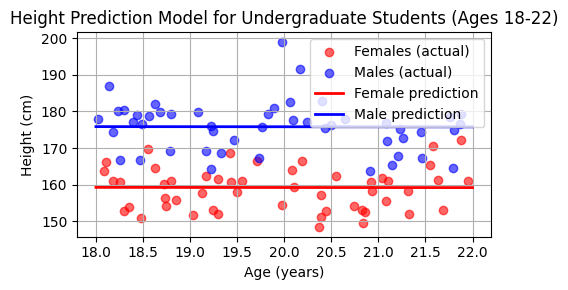

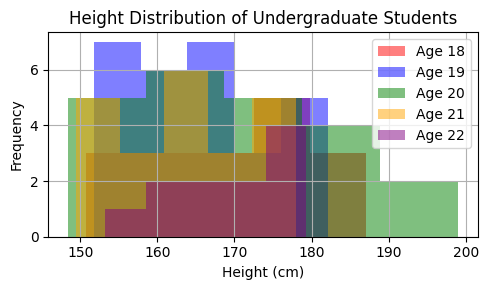

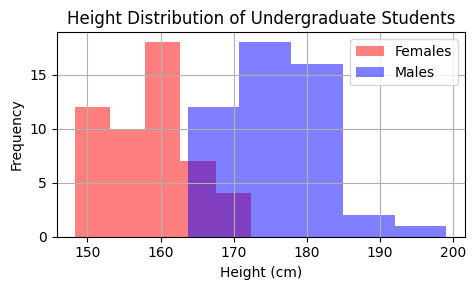

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create synthetic data
np.random.seed(42)
n_samples = 100

# Age: continuous between 18 and 22 (undergraduate age range)
age = 18 + 4 * np.random.random(n_samples)

# Sex: 0 for female, 1 for male
sex = np.random.randint(0, 2, n_samples)

# Height (in cm) based on age and sex with some noise
# Base height: 160 cm
# Sex effect: +15 cm for males
# Age effect: slight decrease from 18 (-0.5 cm per year after 18)
# Some random noise

height = 160 + 15 * sex - 0.5 * (age - 18) + np.random.normal(0, 6.5, n_samples)

# Create dataframe
data = pd.DataFrame({
    'Age': age,
    'Sex': sex,
    'Height': height
})

print("Sample of data:")
print(data.head())

# Split the data
X = data[['Age', 'Sex']]
y = data['Height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print results
print("\nModel coefficients (beta factors):")
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Age coefficient (β₁): {model.coef_[0]:.2f}")
print(f"Sex coefficient (β₂): {model.coef_[1]:.2f}")

print("\nThis means our learned model is:")
print(f"Height = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Age + {model.coef_[1]:.2f} × Sex")

# Evaluate the model
print("\nModel evaluation:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² score: {r2_score(y_test, y_pred):.2f}")

# Demonstrate predictions for specific examples
examples = pd.DataFrame([
    {'Age': 18, 'Sex': 0},  # 18-year-old female
    {'Age': 18, 'Sex': 1},  # 18-year-old male
    {'Age': 20, 'Sex': 0},  # 20-year-old female
    {'Age': 20, 'Sex': 1},  # 20-year-old male
    {'Age': 22, 'Sex': 0},  # 22-year-old female
    {'Age': 22, 'Sex': 1}   # 22-year-old male
])

print("\nPredictions for specific examples:")
predictions = model.predict(examples)
for i, example in examples.iterrows():
    sex_text = "male" if example['Sex'] == 1 else "female"
    print(f"{example['Age']:.1f}-year-old {sex_text}: {predictions[i]:.1f} cm")

# Visualize the results
plt.figure(figsize=(5, 3))

# Plot for females
females = data[data['Sex'] == 0]
plt.scatter(females['Age'], females['Height'], color='red', alpha=0.6, label='Females (actual)')

# Plot for males
males = data[data['Sex'] == 1]
plt.scatter(males['Age'], males['Height'], color='blue', alpha=0.6, label='Males (actual)')

# Plot regression lines
ages_df = pd.DataFrame({'Age': np.linspace(18, 22, 100)})

# Predict for females
female_df = ages_df.copy()
female_df['Sex'] = 0
female_heights = model.predict(female_df)

# Predict for males
male_df = ages_df.copy()
male_df['Sex'] = 1
male_heights = model.predict(male_df)

plt.plot(ages_df['Age'], female_heights, color='red', linestyle='-', linewidth=2, label='Female prediction')
plt.plot(ages_df['Age'], male_heights, color='blue', linestyle='-', linewidth=2, label='Male prediction')

plt.title('Height Prediction Model for Undergraduate Students (Ages 18-22)')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(18, 22.1, 0.5))
plt.tight_layout()
plt.show()

# Show a histogram of the height distribution vs age (rounded to the nearest integer), with each rounded age shown as a different color
rounded_age = data['Age'].round().astype(int)
plt.figure(figsize=(5, 3))
plt.hist(data['Height'][rounded_age == 18], bins=5, alpha=0.5, label='Age 18', color='red')
plt.hist(data['Height'][rounded_age == 19], bins=5, alpha=0.5, label='Age 19', color='blue')
plt.hist(data['Height'][rounded_age == 20], bins=5, alpha=0.5, label='Age 20', color='green')
plt.hist(data['Height'][rounded_age == 21], bins=5, alpha=0.5, label='Age 21', color='orange')
plt.hist(data['Height'][rounded_age == 22], bins=5, alpha=0.5, label='Age 22', color='purple')
plt.legend()
plt.title('Height Distribution of Undergraduate Students')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show a histogram of the height distribution vs sex, with each sex shown as a different color
plt.figure(figsize=(5, 3))
plt.hist(data['Height'][data['Sex'] == 0], bins=5, alpha=0.5, label='Females', color='red')
plt.hist(data['Height'][data['Sex'] == 1], bins=5, alpha=0.5, label='Males', color='blue')
plt.legend()
plt.title('Height Distribution of Undergraduate Students')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

#### 11.1.3 Bias-variance trade-off

When training a multi-variate classifier the configuration of the algorithm determines the number of degrees of freedom and through these the ability of the classifier to pick out small-scale features of the training dataset.

A classifier with few degrees of freedom will lead to very similar results when trained on statistically independent datasets that all are drawn from the same underlying distribution. This is called small _variance_. At the same time, the result will lead to a deviation from the individual dataset as it would not pick out the most fine-grained features; this is called the _bias_ of the classifier.

Conversely, when the classifier is given many degrees of freedom, it will have a smaller bias at the expense of a larger variance.  The balancing of these different criteria is called bias-variance trade-off.

At the point when it starts to pick out statistical fluctuations of the training set it is called _overtrained_.
One way to avoid this is to exploit several datasets that all represent the same underlying distributions. They can for example all be randomly drawn subsets of one bigger sample. The first is called _training dataset_ and is used for the initial round of machine learning. A second set, the _validation dataset_ is used to evaluate the classifier. The training is performed with increasing complexity (i.e. number of degrees of freedom of the algorithm), which should lead to improving signal-background separation. So long as this separation is confirmed by the validation sample all is good. Once the validation sample no longer shows the same improvement of the training sample, the point of overtraining has been reached. Finally, the classifier is applied to a third sample, the test sample.

<img src="images/Overfitting.png" width=40%>
(Source: [Chabacano](https://commons.wikimedia.org/wiki/User:Chabacano), [Overfitting](https://commons.wikimedia.org/wiki/File:Overfitting.svg), [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/legalcode))

### 11.2 Receiver-Operator Characteristic curve

As discussed before, the optimal working point of Type I/II errors or signal efficiency and background rejection depends on the specific problem being analysed. It is instructive to illustrate the different options. The Receiver-Operating Characteristic (ROC) curve shows background rejection as a function of signal efficiency and is constructed by evaluating all possible critical values $c$. 

The ROC curve must always start at $(0,1)$, which corresponds to zero signal efficiency and $100\%$ background rejection, i.e. everything is rejected. The opposite end of the curve is at $(1,0)$, where everything is accepted, i.e. $100\%$ signal efficiency but zero background rejection.

The example below uses two hypothetical signal and background classifier output distributions and builds a ROC curve for these, including highlighting some example points.

The accepted region lies to the right of the threshold value.
The orange curve represents the signal distribution and the blue curve shows the background distribution.
The right-hand graph shows background rejection against signal efficiency, i.e. the ROC curve.

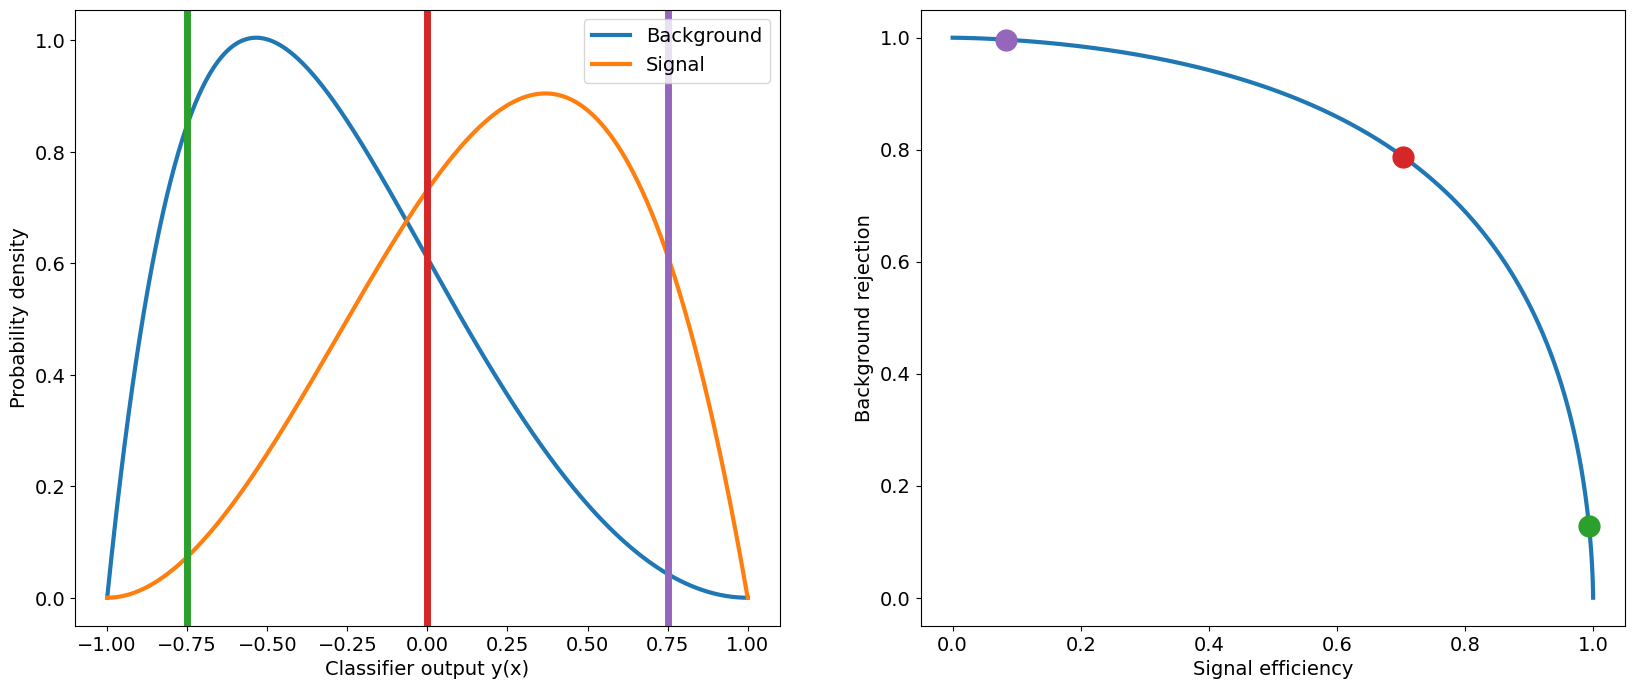

In [2]:
from typing import List
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt

# Define the range for classifier decision boundary
decision_min: float = -1.0
decision_max: float = 1.0

# Number of points for numerical integration
num_points: int = 1000
bin_width: float = (decision_max - decision_min) / num_points

# Create array of decision boundary values
decision_values: np.ndarray = np.linspace(decision_min, decision_max, num_points)

# Define probability density functions for signal and background
# These are example distributions representing classifier outputs
background_pdf: List[float] = [1./5.6793*(1-exp(-2*x-2))*(2*x-2)**2 for x in decision_values]
signal_pdf: List[float] = [1./0.3023*(1-exp(0.25*x-0.25))*(-x-1)**2 for x in decision_values]

# Calculate ROC curve points through numerical integration
# ROC shows relationship between signal efficiency and background rejection
signal_efficiency: List[float] = []
background_rejection: List[float] = []
cum_signal: float = 0.0
cum_background: float = 0.0

# Integrate PDFs to get cumulative distributions
for bkg, sig in zip(background_pdf, signal_pdf):
    cum_background += bkg * bin_width
    cum_signal += sig * bin_width
    # ROC points: (1 - cumulative signal) vs (cumulative background)
    signal_efficiency.append(1.0 - cum_signal)
    background_rejection.append(cum_background)

# Create two subplots: PDF distributions and ROC curve
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Classifier output distributions
ax[0].plot(decision_values, background_pdf, linewidth=3, label='Background')
ax[0].plot(decision_values, signal_pdf, linewidth=3, label='Signal')
ax[0].set_xlabel('Classifier output y(x)')
ax[0].set_ylabel('Probability density')
ax[0].legend()

# Plot 2: ROC curve
ax[1].plot(signal_efficiency, background_rejection, linewidth=3)
ax[1].set_xlabel('Signal efficiency')
ax[1].set_ylabel('Background rejection')

# Mark three example decision boundaries on both plots
example_points: List[int] = [int(num_points/8), int(num_points/2), int(7*num_points/8)]
for idx, point in enumerate(example_points):
    # Plot points on ROC curve
    eff = signal_efficiency[point]
    rej = background_rejection[point]
    ax[1].plot(eff, rej, 'o', c=f'C{idx+2}', markersize=15)
    
    # Show corresponding decision boundaries on PDF plot
    decision_value = decision_min + point * bin_width
    ax[0].axvline(x=decision_value, color=f'C{idx+2}', linewidth=5)

### 11.3 Cross-validation

Cross-validation describes a useful approach when the sample size is limited. It refers to a given dataset being split in e.g. ten subsets. If training and validation are carried out on four of the ten subsets each, they can exploit nearly all of the statistical power of the data. The classifier is then applied to the remaining two subsets.

The assignment of the ten subsets to the three samples, training, validation and test, are cycled through, such that (in this example) five classifier trainings have to be carried out. While this comes at some computational expense is has the advantage of making optimal use of the available data without having to sacrifice a subset for training and validation.

The plot below illustrates two scenarios of splitting a dataset into training, validation, and test datasets.

<img src="images/CrossValidation.png" width=60%>

#### Bootstrapping

Before diving into different concrete techniques, it is a good point to introduce a concept that is very powerful and widely used: bootstrapping.

One is often faced with datasets of limited size but the task of creating an ensemble of datasets to be used in the context of hypothesis testing (which includes classification).

Such ensembles can be created via bootstrapping in two different ways depending on the exact context:
- One can randomly draw a subset from the full dataset (i.e. by drawing with replacement) and repeat this multiple times. This generates different subsets; however, they are not completely statistically independent.
- In the context of classification one can randomly assign signal and background labels (or whatever categories apply) to a dataset and repeat this to generate multiple datasets with randomised labels.

Both variants can be used for example to create an ensemble of datasets to establish the distribution of a test statistic for a null hypothesis from.

### 11.4 Multi-variate classification techniques

In the following a few classification techniques are introduced. In the context of this lecture, this can only happen at a rather superficial level. Anyone interested in this is referred to the vast amount of literature available on this topic, which of course includes the two resources used for this lecture.

- Multi-variate classification techniques
   - k-Nearest Neighbour
   - Artificial Neural Networks
   - Boosted Decision Trees

##### Some input data

Data shape: (150, 4)
First sample measurements: [5.1 3.5 1.4 0.2]
Target shape: (150,)
Target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Species names: ['setosa' 'versicolor' 'virginica']


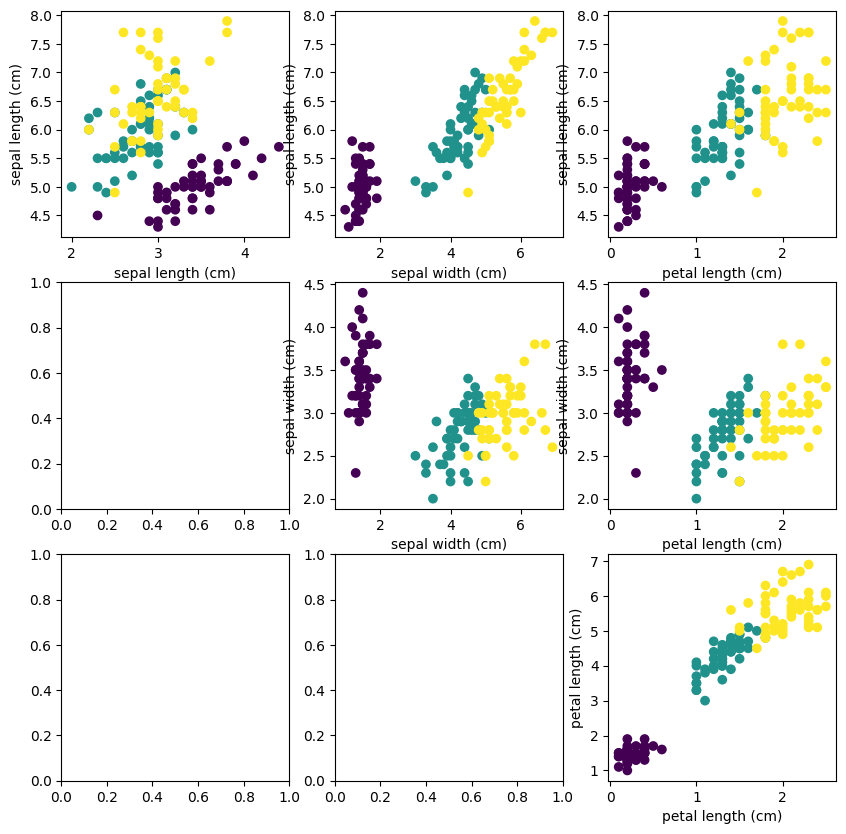

In [17]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import neighbors

# Load the classic Iris dataset (3 species of iris flowers)
iris_dataset = load_iris()

# Print basic information about the dataset
print(f"Data shape: {iris_dataset.data.shape}")  # (samples, features)
n_samples, n_features = iris_dataset.data.shape

# Display first sample's measurements and dataset structure
print(f"First sample measurements: {iris_dataset.data[0]}")
print(f"Target shape: {iris_dataset.target.shape}")  # One label per sample
print(f"Target labels: {iris_dataset.target}")  # Numerical labels (0, 1, 2)
print(f"Species names: {iris_dataset.target_names}")  # Actual species names

# Extract individual features (sepal length, sepal width, petal length, petal width)
iris_features: List[List[float]] = [
    [sample[i] for sample in iris_dataset.data] 
    for i in range(n_features)
]

feature_names: List[str] = iris_dataset.feature_names

# Create scatter plots comparing pairs of features
# This helps visualize how well features separate different classes
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

# Plot each feature against others (upper triangular matrix of plots)
for i in range(3):
    for j in range(i, 3):
        # Color points by their species (target)
        ax[i][j].scatter(
            iris_features[j+1],  # Feature on x-axis
            iris_features[i],    # Feature on y-axis
            marker='o',
            c=iris_dataset.target  # Color by species
        )
        # Label axes with feature names for clarity
        ax[i][j].set_xlabel(feature_names[j])  # Use feature names instead of numbers
        ax[i][j].set_ylabel(feature_names[i])  # Use feature names instead of numbers

plt.show()

#### 11.4.1 k-Nearest Neighbour Classifier

The power of multi-variate classifiers is that they can pick out features that are not obvious by looking at individual observables. This is where the "curse of dimensionality" enters as a small fraction of input phase space represents a large fraction of each variable. As an example, considering a ten-dimensional hypercube of size $1^{10}$, a sub-region that covers as much as half the length in each dimension covers about $0.1\%$ of the total volume.

The k-Nearest Neighbour (kNN) approach addresses this by counting the number of items of the same class (signal or background) in a hyper-sphere around the event in question. By counting up to a total of $k$ nearest neighbours, the method automatically scales the size of the volume that is investigated with the density of entries.

The local densities can then be approximated by the number of signal and background items found among the k nearest neighbours as

$$\frac{p({\bf x}|S)}{p({\bf x}|B)}\propto \frac{P(S|{\bf x})}{P(B|{\bf x})}\approx \frac{k_s({\bf x})}{k_b({\bf x})}.$$

Taking the numbers of signal and background events in the training sample, one can define the probability of a test event at the phase-space point ${\bf x}$ being of signal type:

$$P_s({\bf x})=\frac{k_s({\bf x})}{k_s({\bf x})+k_b({\bf x})}=\frac{k_s({\bf x})}{k({\bf x})}.$$

The example below shows four-dimensional data analysed by a kNN classifier. It shows one of the 2D projections and the classifier output for a range of values of $k$.

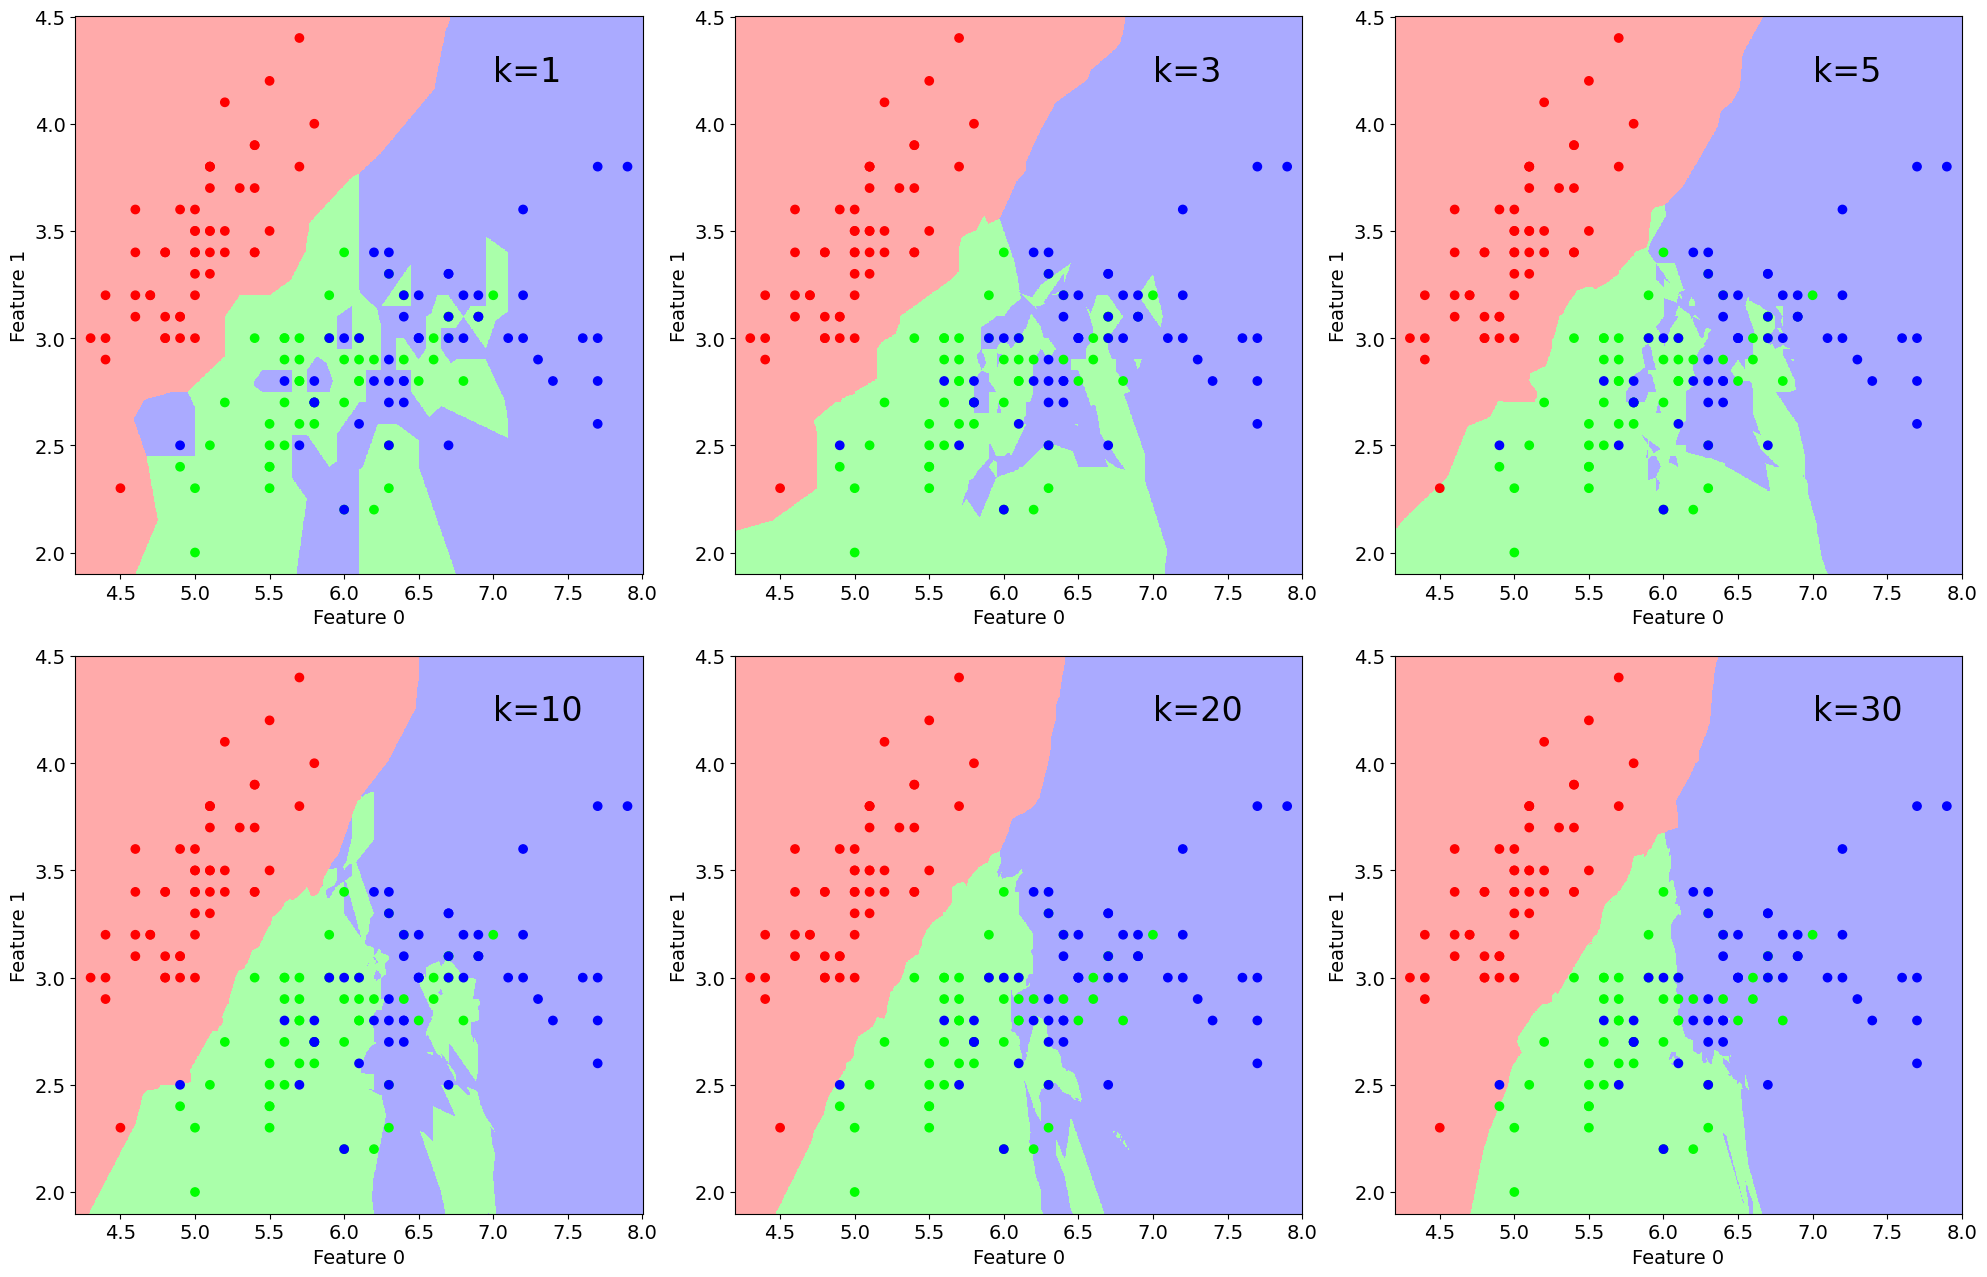

In [6]:
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_decision_boundaries(
    features: np.ndarray, 
    labels: np.ndarray,
    k_values: list[int] = [1, 3, 5, 10, 20, 30]
) -> None:
    """
    Visualize KNN classification decision boundaries for different k values.
    
    Args:
        features: Input features (first two dimensions only)
        labels: Target classifications
        k_values: List of k-nearest neighbors to test
    """
    # Define colors for visualization (one for each class)
    background_colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    point_colors = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Create subplot grid
    fig, axes = plt.subplots(2, 3, figsize=(20, 13))
    axes = axes.ravel()  # Flatten axes for easier iteration

    # Create mesh grid for decision boundary visualization
    x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 1000),
        np.linspace(y_min, y_max, 1000)
    )

    # Plot decision boundaries for each k value
    for idx, k in enumerate(k_values):
        # Initialize and train KNN classifier
        knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(features, labels)
        
        # Predict class labels for all points in mesh grid
        mesh_predictions = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        mesh_predictions = mesh_predictions.reshape(xx.shape)
        
        # Plot decision regions (background colors)
        axes[idx].pcolormesh(xx, yy, mesh_predictions, cmap=background_colors)
        
        # Plot training points
        axes[idx].scatter(
            features[:, 0], 
            features[:, 1], 
            c=labels, 
            cmap=point_colors
        )
        
        # Add labels and k value
        axes[idx].set_xlabel('Feature 0')
        axes[idx].set_ylabel('Feature 1')
        axes[idx].text(7, 4.2, f'k={k}', fontsize=24)

    plt.tight_layout()
    
# Load and prepare iris dataset
iris = datasets.load_iris()
iris_features = iris.data[:, :2]  # Use only first two features for visualization
iris_labels = iris.target

# Create visualization
plot_knn_decision_boundaries(iris_features, iris_labels)

##### Comments

We can see that taking into account more and more neighbours leads to smoother contours of the classification boundaries. The $k=1$ case almost certainly represents a severe case of overtraining as it picks out almost all of the features of the training sample.

For a full interpretation of the quality of the training, we would require a validation sample. Note that the plots above represent a 2D view of a 4D parameter space.

#### 11.4.2 Artificial Neural Networks

Artificial neural networks use the combination of an arbitrary number of functions to pick out features in the dataset. They are based on a linear mapping

$$y({\bf x})=w_0+\sum_{m=1}^M w_m \cdot h_m({\bf x}),$$

with weights $w_i$ and basis functions $h_m({\bf x})$.

It is more efficient to use a single function $h(t)$ for which functions like sigmoid, $h(t)=1/(1+e^{-t})$, turn out to be most useful as they are approximately linear for some variable range and constant otherwise. This means they select or "activate" a part of the variable range and are therefore called activation function.

In order to retain flexibility when using a single function, the variables undergo a linear transformation resulting in

$$y({\bf x})=w_0^2+\sum_{m=1}^M\left[w_m^2\cdot h\left( w_{0m}^1 + \sum_{k=1}^D w_{km}^1 x_k \right) \right].$$

The following plot shows the schematic layout of such a network with $D=4$ input variables and $M=5$ activation functions.

<img src="images/ANN.png" width=80%>

Several different structures of neural networks exist with increasingly complex structures, e.g. with more than one hidden layer.

/Users/user/The University of Manchester Dropbox/Patrick Parkinson/Teaching/Lecturing/intro_data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model accuracy: 1.0000


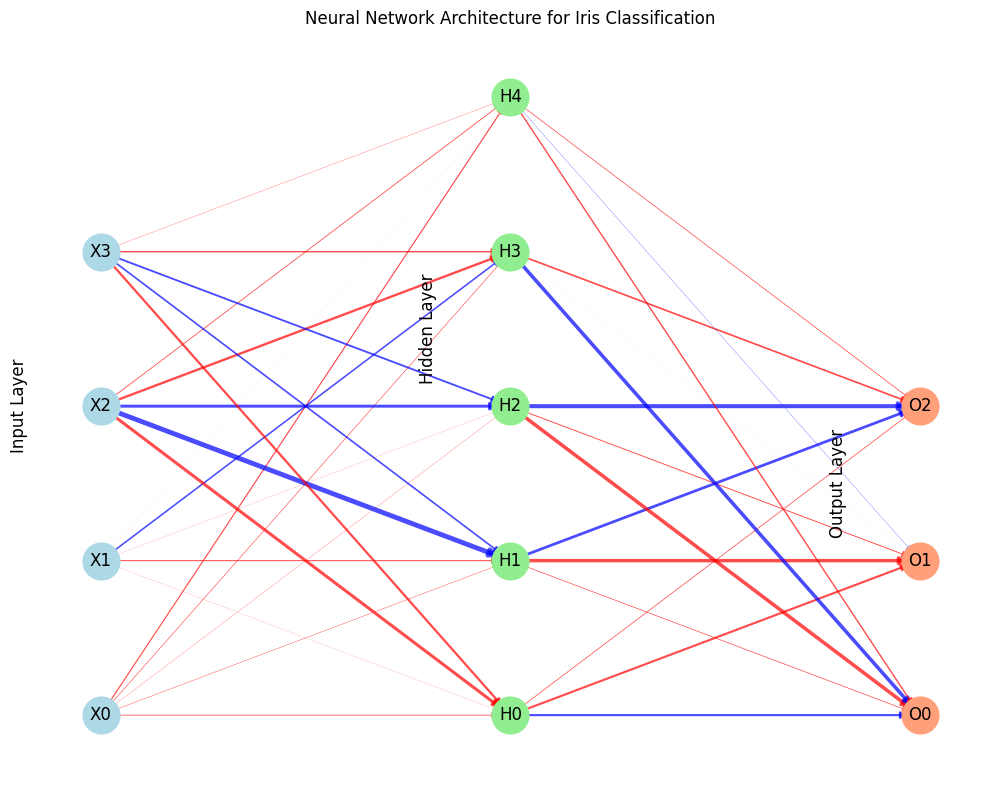

<Figure size 1000x800 with 0 Axes>

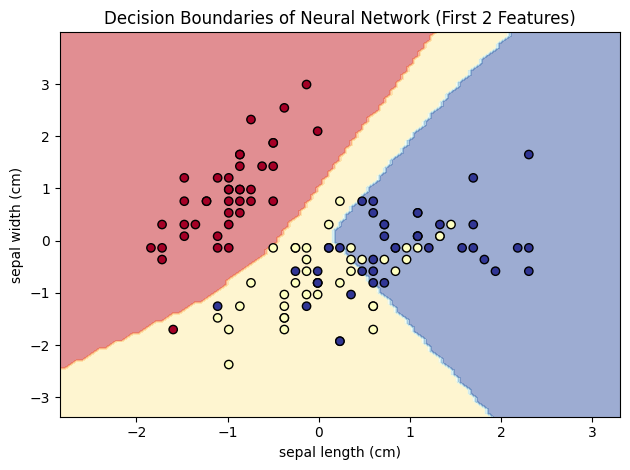

Total number of coefficients in the model: 35


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import networkx as nx

# 1. Load and prepare the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# For visualization purposes, we'll use just the first two features
X_2d = X[:, :2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2d, X_test_2d = X_train[:, :2], X_test[:, :2]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_2d_scaled = scaler.fit_transform(X_train_2d)
X_test_2d_scaled = scaler.transform(X_test_2d)

# 2. Create and train the neural network
# Single hidden layer with 5 neurons, ReLU activation
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', 
                    solver='adam', random_state=42, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

# For the 2D model
mlp_2d = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', 
                      solver='adam', random_state=42, max_iter=1000)
mlp_2d.fit(X_train_2d_scaled, y_train)

# 3. Evaluate the model
accuracy = mlp.score(X_test_scaled, y_test)
print(f"Model accuracy: {accuracy:.4f}")

# 4. Visualize the neural network structure
def visualize_neural_network(mlp):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes
    # Input layer
    for i in range(X.shape[1]):
        G.add_node(f"i{i}", pos=(0, i), layer=0, label=f"X{i}")
    
    # Hidden layer
    for i in range(mlp.hidden_layer_sizes[0]):
        G.add_node(f"h{i}", pos=(1, i), layer=1, label=f"H{i}")
    
    # Output layer
    for i in range(len(np.unique(y))):
        G.add_node(f"o{i}", pos=(2, i), layer=2, label=f"O{i}")
    
    # Add edges with weights from input to hidden layer
    weights = mlp.coefs_
    for i in range(X.shape[1]):
        for j in range(mlp.hidden_layer_sizes[0]):
            weight = weights[0][i, j]
            width = abs(weight) * 2  # Scale the width for visualization
            G.add_edge(f"i{i}", f"h{j}", weight=weight, width=width, 
                       color='red' if weight < 0 else 'blue')
    
    # Add edges from hidden to output layer
    for i in range(mlp.hidden_layer_sizes[0]):
        for j in range(len(np.unique(y))):
            weight = weights[1][i, j]
            width = abs(weight) * 2  # Scale the width for visualization
            G.add_edge(f"h{i}", f"o{j}", weight=weight, width=width, 
                       color='red' if weight < 0 else 'blue')
    
    # Set up the plot
    plt.figure(figsize=(10, 8))
    plt.title("Neural Network Architecture for Iris Classification")
    
    # Extract positions from nodes
    pos = nx.get_node_attributes(G, 'pos')
    
    # Draw nodes by layer with different colors
    layer_colors = ['lightblue', 'lightgreen', 'lightsalmon']
    for layer in range(3):
        nx.draw_networkx_nodes(
            G, pos, 
            nodelist=[node for node in G.nodes if G.nodes[node]['layer'] == layer],
            node_color=layer_colors[layer],
            node_size=700
        )
    
    # Draw edges with weights as colors and thickness
    for (u, v, data) in G.edges(data=True):
        nx.draw_networkx_edges(
            G, pos, edgelist=[(u, v)],
            width=data['width'],
            edge_color=data['color'],
            alpha=0.7
        )
    
    # Draw node labels
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)
    
    # Add layer labels
    plt.text(-0.2, X.shape[1]/2, "Input Layer", rotation=90, ha='center', va='center', fontsize=12)
    plt.text(0.8, mlp.hidden_layer_sizes[0]/2, "Hidden Layer", rotation=90, ha='center', va='center', fontsize=12)
    plt.text(1.8, len(np.unique(y))/2, "Output Layer", rotation=90, ha='center', va='center', fontsize=12)
    
    plt.axis('off')
    plt.tight_layout()

# Visualize the neural network
visualize_neural_network(mlp)

# 5. Visualize the decision boundaries in 2D
def plot_decision_boundaries():
    plt.figure(figsize=(10, 8))
    
    # Plot decision boundary
    disp = DecisionBoundaryDisplay.from_estimator(
        mlp_2d,
        X_train_2d_scaled,
        response_method="predict",
        alpha=0.5,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        cmap=plt.cm.RdYlBu
    )
    
    # Plot training points
    scatter = plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], 
                         c=y_train, edgecolors='k', cmap=plt.cm.RdYlBu)
    
    plt.title("Decision Boundaries of Neural Network (First 2 Features)")
    legend_elements, _ = scatter.legend_elements()
    #plt.legend(handles=legend_elements, labels=iris.target_names)
    plt.tight_layout()

# Plot the decision boundaries
plot_decision_boundaries()

# Show both visualizations
plt.show()

# Print the total number of coefficients that are trained in this model
n_coefficients = sum([np.prod(w.shape) for w in mlp.coefs_])
print(f"Total number of coefficients in the model: {n_coefficients}")

#### 11.4.3 (Boosted) Decision Trees

Decision trees are based on a tree-like structure in which a decision is taken based on one variable and each of the outcomes then leads on to a decision being taken for the next variable, where the second level depends on the outcome of the first.

As a single decision tree offers limited flexibility, there are a number of concepts that increase complexity. One very widely used technique is boosting. This uses the output of several decision trees and computes a linear combination thereof to achieve a classifier output

$$y({\bf x};\alpha_0,\ldots,\alpha_M,{\bf a_0,\dots,a_M})=\sum_{m=0}^M \alpha_m b({\bf x; a_m}),$$

where ${\bf a_m}$ are the parameters of the individual trees and $\alpha_m$ are the boosting weights. There are different algorithms to optimise the boosting and train these classifiers.

<img src="images/random_forest.png" width=80%>
(Source: [Towards Digital Staining using Imaging Mass Spectrometry and Random Forests-Technical Report](https://www.researchgate.net/publication/228540194_Towards_Digital_Staining_using_Imaging_Mass_Spectrometry_and_Random_Forests-Technical_Report), Michael Hanselmann et al., 2009)

Training accuracy: 0.9810
Testing accuracy: 1.0000


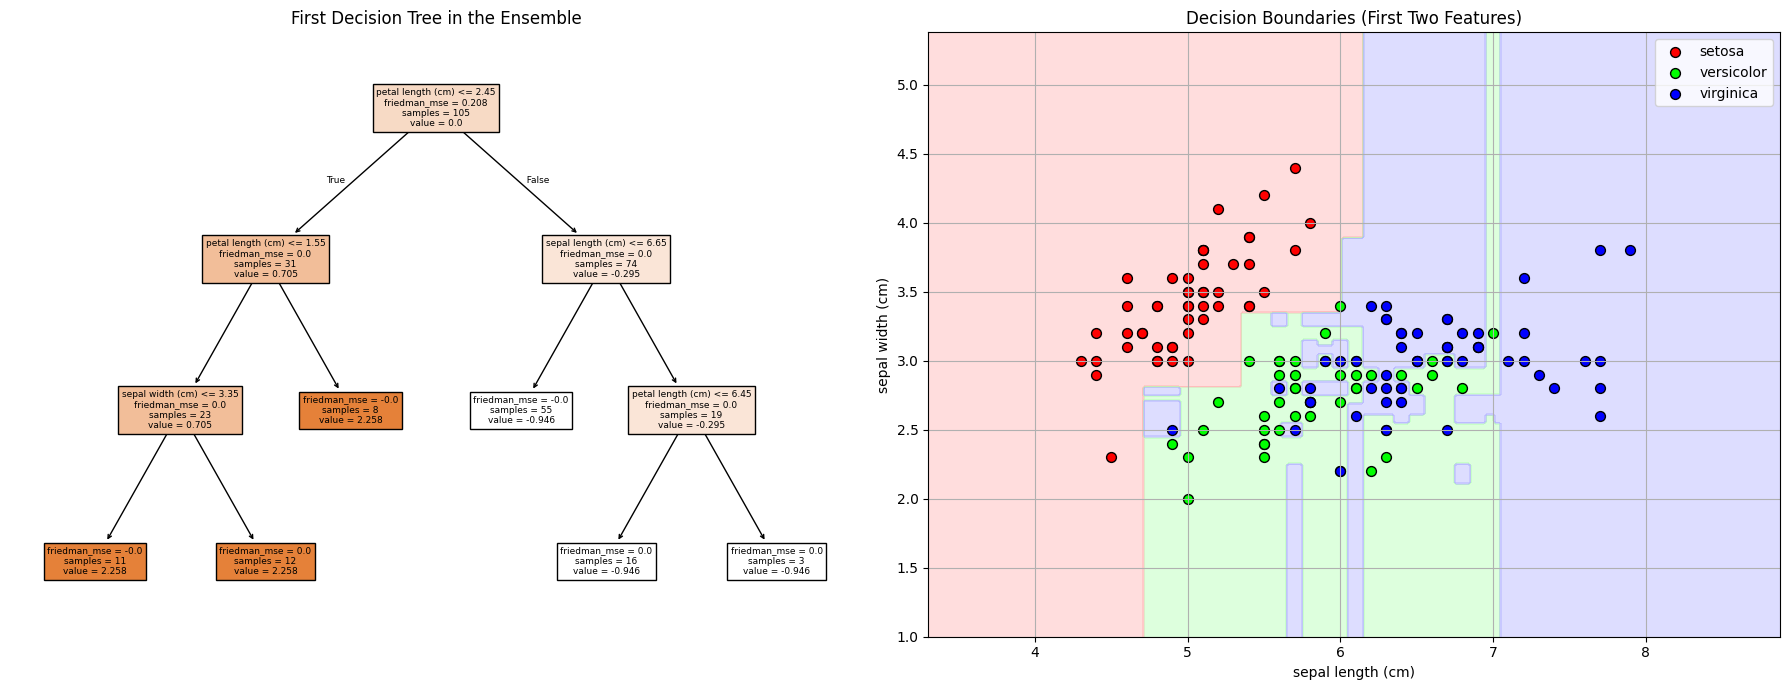

Total number of trained parameters in the model: 96


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gradient Boosting Classifier (boosted decision tree)
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# Evaluate the model
train_score = gbc.score(X_train, y_train)
test_score = gbc.score(X_test, y_test)
print(f"Training accuracy: {train_score:.4f}")
print(f"Testing accuracy: {test_score:.4f}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot the first estimator (decision tree)
plot_tree(gbc.estimators_[0, 0], feature_names=feature_names, 
          class_names=target_names, filled=True, ax=ax1)
ax1.set_title("First Decision Tree in the Ensemble")

# Plot the decision boundaries using only the first two features
# Create a mesh grid to visualize decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train a new model using only the first two features
gbc_2d = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc_2d.fit(X_train[:, :2], y_train)

# Make predictions on the mesh grid
Z = gbc_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a custom colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries
ax2.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)

# Plot the training points
for i, color in zip(range(3), cmap_bold.colors):
    idx = np.where(y == i)
    ax2.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i], edgecolor='k', s=50)

ax2.set_title("Decision Boundaries (First Two Features)")
ax2.set_xlabel(feature_names[0])
ax2.set_ylabel(feature_names[1])
ax2.legend(loc='upper right')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print how many trained parameters are in the model in total
n_params = sum([np.prod(tree.tree_.feature.shape) for tree in gbc.estimators_[:, 0]])
print(f"Total number of trained parameters in the model: {n_params}")

### 11.5 Comparison of different classification algorithms

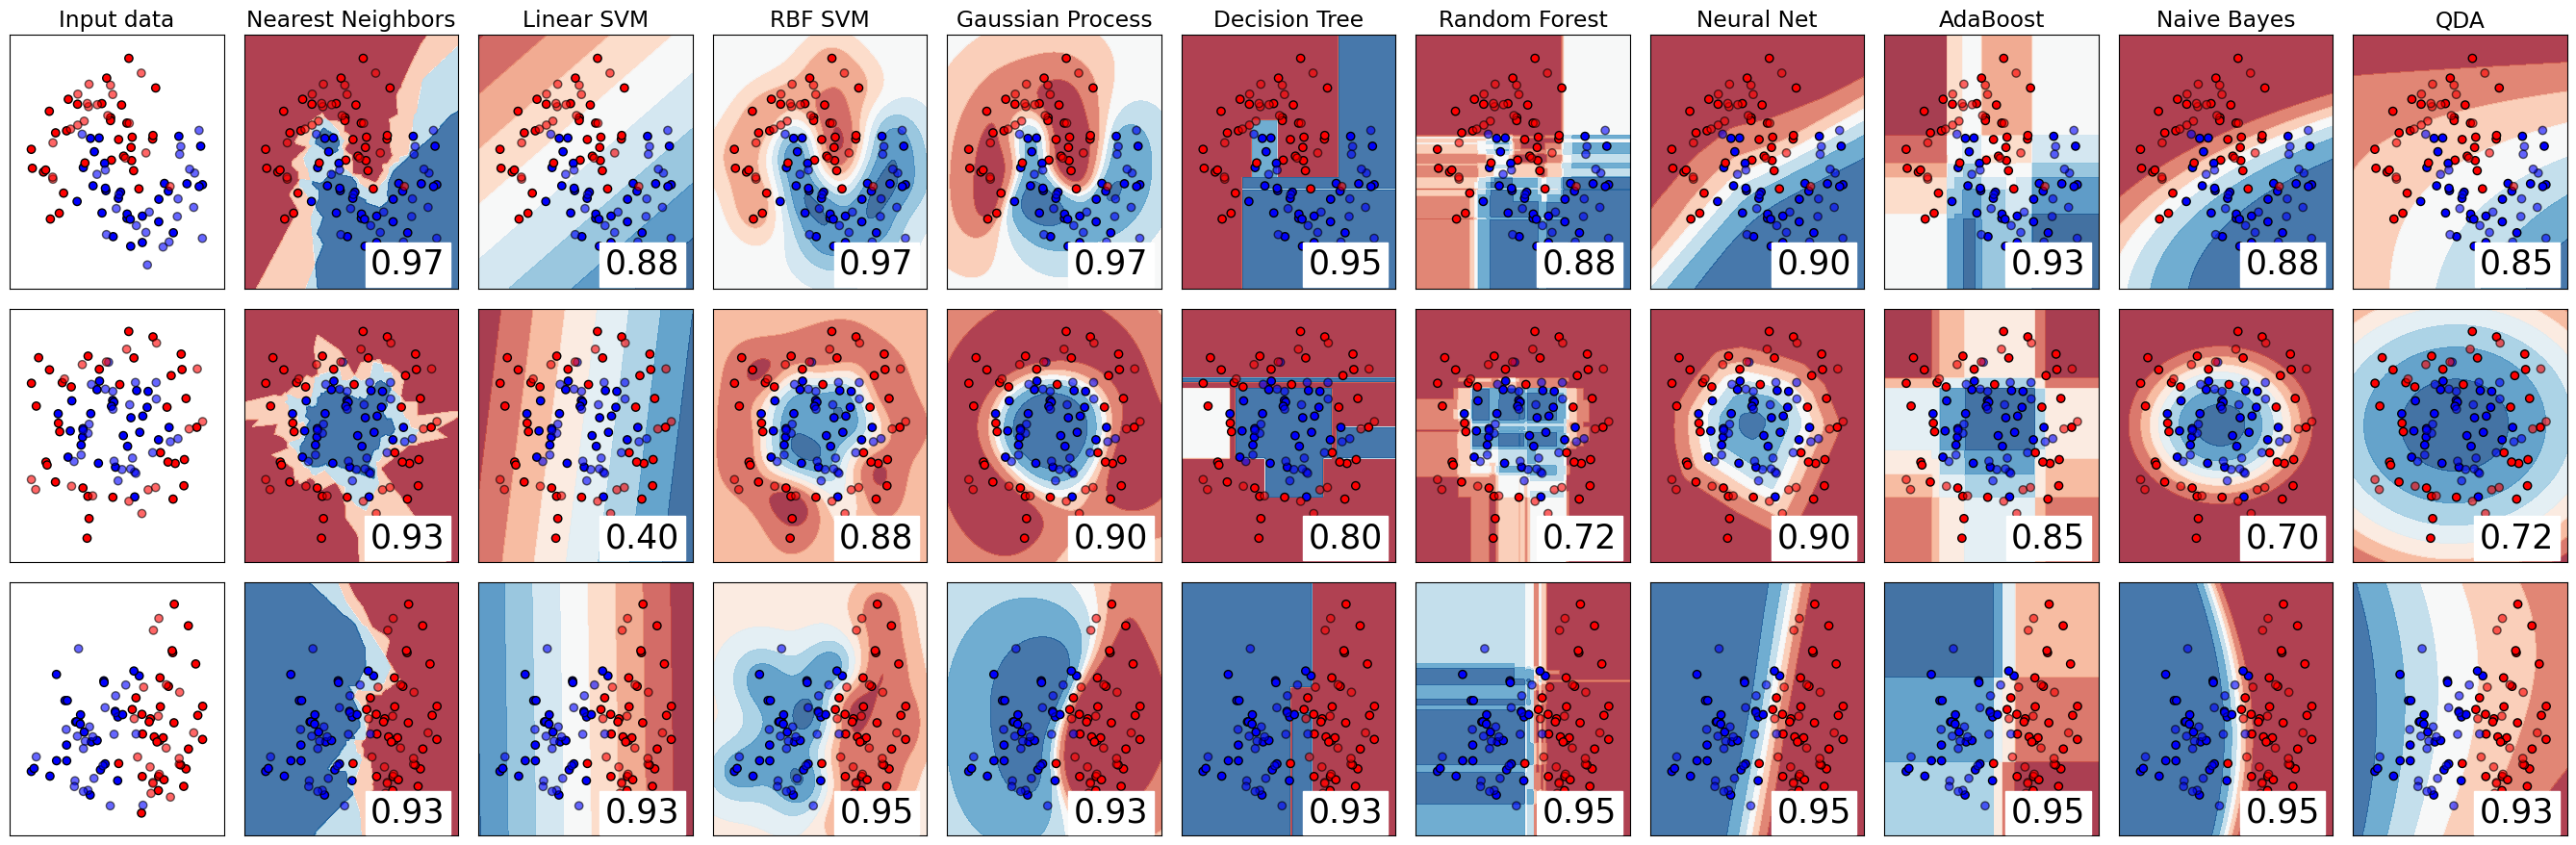

In [7]:
"""
Comparison of different classification algorithms on synthetic datasets.
This demonstrates how different classifiers perform on various data distributions.
"""

from typing import Tuple, List
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Grid resolution for plotting decision boundaries
MESH_STEP_SIZE: float = 0.02

# Define classifier names and their corresponding models
CLASSIFIER_NAMES: List[str] = [
    "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
    "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
    "Naive Bayes", "QDA"
]

# Initialize classifiers with their parameters
classifiers = [
    KNeighborsClassifier(n_neighbors=3),                    # Simple distance-based classifier
    SVC(kernel="linear", C=0.025),                         # Linear boundary
    SVC(gamma=2, C=1),                                     # Non-linear boundary
    GaussianProcessClassifier(1.0 * RBF(1.0)),            # Probabilistic classifier
    DecisionTreeClassifier(max_depth=5),                   # Tree-based decision rules
    RandomForestClassifier(max_depth=5, n_estimators=10),  # Ensemble of trees
    MLPClassifier(alpha=1, max_iter=500, activation='relu'), # Neural network
    AdaBoostClassifier(),                                  # Boosting ensemble
    GaussianNB(),                                          # Probabilistic classifier
    QuadraticDiscriminantAnalysis()                        # Quadratic boundary
]

# Generate synthetic datasets
def create_datasets() -> List[Tuple[np.ndarray, np.ndarray]]:
    """Create three different synthetic datasets for classification."""
    # Dataset 1: Two moons
    moons = make_moons(noise=0.3, random_state=0)
    
    # Dataset 2: Concentric circles
    circles = make_circles(noise=0.2, factor=0.5, random_state=1)
    
    # Dataset 3: Linearly separable data
    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             random_state=1, n_clusters_per_class=1)
    # Add random noise
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    
    return [moons, circles, (X, y)]

def plot_classification_results() -> None:
    """Plot the classification results for each dataset and classifier."""
    datasets = create_datasets()
    
    # Create figure
    fig = plt.figure(figsize=(27, 9))
    plot_idx = 1
    
    # Color maps for visualization
    color_map = plt.cm.RdBu
    color_map_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    # Iterate through datasets
    for dataset_idx, (X, y) in enumerate(datasets):
        # Standardize features
        X = StandardScaler().fit_transform(X)
        
        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=42
        )
        
        # Create mesh grid for plotting decision boundaries
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, MESH_STEP_SIZE),
            np.arange(y_min, y_max, MESH_STEP_SIZE)
        )
        
        # Plot input data
        ax = plt.subplot(len(datasets), len(classifiers) + 1, plot_idx)
        if dataset_idx == 0:
            ax.set_title("Input data")
            
        # Plot training and test points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=color_map_bright,
                  edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=color_map_bright,
                  alpha=0.6, edgecolors='k')
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        plot_idx += 1
        
        # Iterate through classifiers
        for name, clf in zip(CLASSIFIER_NAMES, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, plot_idx)
            
            # Train classifier
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            
            # Get decision boundary
            mesh_points = np.c_[xx.ravel(), yy.ravel()]
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(mesh_points)
            else:
                Z = clf.predict_proba(mesh_points)[:, 1]
            
            # Plot decision boundary
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=color_map, alpha=.8)
            
            # Plot data points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=color_map_bright,
                      edgecolors='k')
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=color_map_bright,
                      edgecolors='k', alpha=0.6)
            
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            
            if dataset_idx == 0:
                ax.set_title(name)
            
            # Show accuracy score
            ax.text(xx.max() - .3, yy.min() + .3, f'{score:.2f}',
                   size=25, horizontalalignment='right', 
                   color='black', backgroundcolor='white')
            plot_idx += 1

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_classification_results()

### 11.6 Principal component analysis

What if our high dimensionality input does not contain independant variables?

The "wine" dataset contains 13 different chemical variables for 178 different wine samples. These wines comes from one of three regions in Italy.

We *could* use all 13 dimensions to help us with analysis, but if they are not independent, then we can use fewer.

How do we find the independent variables?

Principal component analysis is a linear transformation (rotation and stretching) in hyper-space, such that the directions highest variance are aligned with the axes. We can then reduce the dimensionality by *projecting* (taking the first few axes) whilst maintaining *most* of the information.

Mathematically, we must find a transformation matrix $\overline{W}$ such that a data point $X$ is transformed to $T$, where successive elements of $T$ contain the maximum possible variance from $X$:

$T = X\overline{W}$

This is a bit like looking for eigenvectors of the covariance matrix - the directions of maximum variance in the data. The eigenvectors (always) form an orthogonal basis, and the eigenvalues measure the variance along each principal component. Sorting by these provides eigenvalues in decreasing order of importance.

Dataset shape: (178, 14)

Feature names:
1. alcohol
2. malic_acid
3. ash
4. alcalinity_of_ash
5. magnesium
6. total_phenols
7. flavanoids
8. nonflavanoid_phenols
9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Target classes (wine origins):
0: class_0
1: class_1
2: class_2

Explained variance ratio by component:
PC1: 0.3620 (0.3620 cumulative)
PC2: 0.1921 (0.5541 cumulative)
PC3: 0.1112 (0.6653 cumulative)
PC4: 0.0707 (0.7360 cumulative)
PC5: 0.0656 (0.8016 cumulative)
PC6: 0.0494 (0.8510 cumulative)
PC7: 0.0424 (0.8934 cumulative)
PC8: 0.0268 (0.9202 cumulative)
PC9: 0.0222 (0.9424 cumulative)
PC10: 0.0193 (0.9617 cumulative)
PC11: 0.0174 (0.9791 cumulative)
PC12: 0.0130 (0.9920 cumulative)
PC13: 0.0080 (1.0000 cumulative)


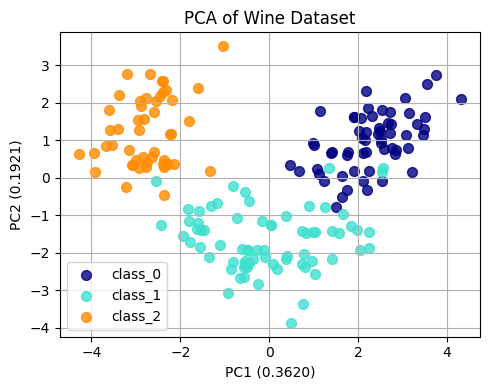


Feature contributions to PC1:
                         Feature       PC1
6                     flavanoids  0.422934
5                  total_phenols  0.394661
11  od280/od315_of_diluted_wines  0.376167
8                proanthocyanins  0.313429
7           nonflavanoid_phenols -0.298533

Feature contributions to PC2:
            Feature       PC2
9   color_intensity  0.529996
0           alcohol  0.483652
12          proline  0.364903
2               ash  0.316069
4         magnesium  0.299634

Interpretation of PC1:
  Wines with high PC1 values tend to have:
    - Higher flavanoids (0.4229)
    - Higher total_phenols (0.3947)
    - Higher od280/od315_of_diluted_wines (0.3762)
    - Higher proanthocyanins (0.3134)
    - Lower nonflavanoid_phenols (-0.2985)

Interpretation of PC2:
  Wines with high PC2 values tend to have:
    - Higher color_intensity (0.5300)
    - Higher alcohol (0.4837)
    - Higher proline (0.3649)
    - Higher ash (0.3161)
    - Higher magnesium (0.2996)


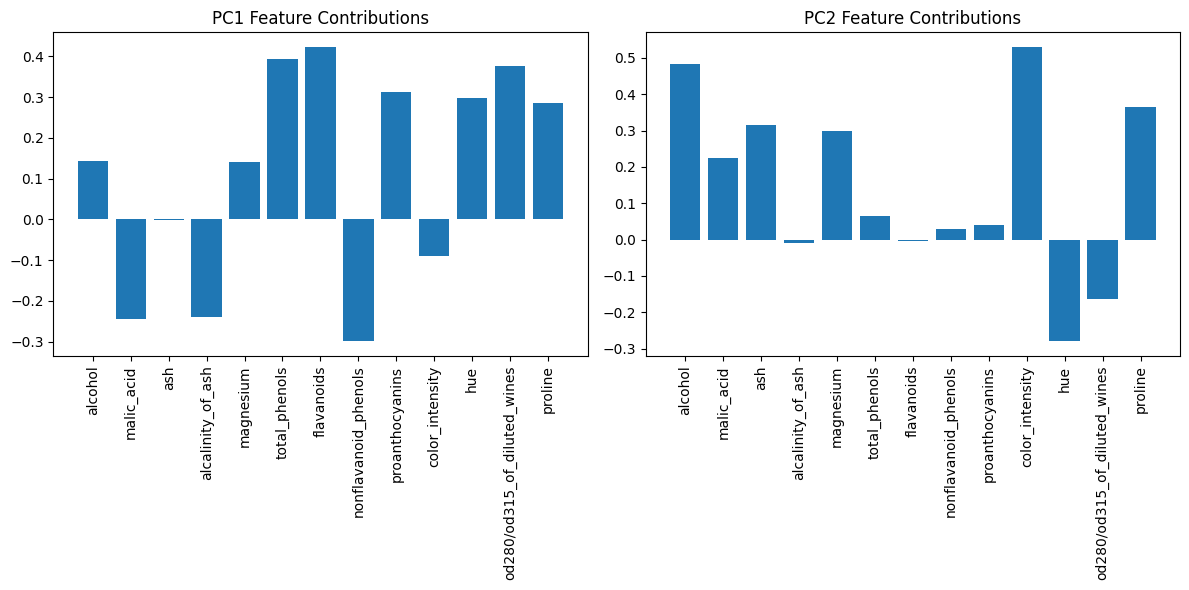

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Create a DataFrame for easier handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Print basic dataset information
print(f"Dataset shape: {df.shape}")
print("\nFeature names:")
for i, feature in enumerate(feature_names):
    print(f"{i+1}. {feature}")

print("\nTarget classes (wine origins):")
for i, target in enumerate(wine.target_names):
    print(f"{i}: {target}")

# Standardize the features (important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=X_pca[:, 0:2],
    columns=['PC1', 'PC2']
)
pca_df['target'] = y

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print variance explained by each component
print("\nExplained variance ratio by component:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.4f} ({cumulative_variance[i]:.4f} cumulative)")


# Scatter plot of the first two principal components
plt.figure(figsize=(5, 4))
colors = ['navy', 'turquoise', 'darkorange']
targets = [0, 1, 2]
target_names = wine.target_names

for target, color in zip(targets, colors):
    indices = pca_df['target'] == target
    plt.scatter(
        pca_df.loc[indices, 'PC1'],
        pca_df.loc[indices, 'PC2'],
        c=color,
        s=50,
        alpha=0.8,
        label=target_names[target]
    )

plt.title('PCA of Wine Dataset')
plt.xlabel(f'PC1 ({explained_variance[0]:.4f})')
plt.ylabel(f'PC2 ({explained_variance[1]:.4f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze component loadings (coefficients)
loadings = pca.components_
n_features = len(feature_names)

plt.figure(figsize=(12, 6))
for i, pc in enumerate(['PC1', 'PC2']):
    plt.subplot(1, 2, i+1)
    indices = np.arange(n_features)
    plt.bar(indices, loadings[i])
    plt.xticks(indices, feature_names, rotation=90)
    plt.title(f'{pc} Feature Contributions')
    plt.tight_layout()


# Feature contribution table for the first two PCs
pc_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1': loadings[0],
    'PC2': loadings[1]
})
pc_df = pc_df.sort_values(by='PC1', key=abs, ascending=False)
print("\nFeature contributions to PC1:")
print(pc_df[['Feature', 'PC1']].head(5))

pc_df = pc_df.sort_values(by='PC2', key=abs, ascending=False)
print("\nFeature contributions to PC2:")
print(pc_df[['Feature', 'PC2']].head(5))

# Function to print the interpretation of a principal component
def interpret_pc(pc_index, n_top_features=3):
    """Display top positive and negative contributors to a PC"""
    coefficients = loadings[pc_index]
    # Get indices of the features sorted by absolute coefficient value
    sorted_indices = np.argsort(np.abs(coefficients))[::-1]
    top_indices = sorted_indices[:n_top_features]
    
    # Create lists for feature names and their coefficients
    top_features = [feature_names[i] for i in top_indices]
    top_coeffs = coefficients[top_indices]
    
    # Separate positive and negative contributions
    pos_features = []
    neg_features = []
    pos_coeffs = []
    neg_coeffs = []
    
    for feature, coef in zip(top_features, top_coeffs):
        if coef > 0:
            pos_features.append(feature)
            pos_coeffs.append(coef)
        else:
            neg_features.append(feature)
            neg_coeffs.append(coef)
    
    print(f"\nInterpretation of PC{pc_index+1}:")
    print(f"  Wines with high PC{pc_index+1} values tend to have:")
    for feature, coef in zip(pos_features, pos_coeffs):
        print(f"    - Higher {feature} ({coef:.4f})")
    for feature, coef in zip(neg_features, neg_coeffs):
        print(f"    - Lower {feature} ({coef:.4f})")

# Interpret the first two PCs
interpret_pc(0, n_top_features=5)
interpret_pc(1, n_top_features=5)

##### 11.6.2 Two dimensional data

We can also use the PCA approach for images or 2D data. Again, this is explaining the primary variation in the image - it is a way to approximate images with the least possible number of "basis" images.

Loading and preprocessing neutral face images from CFD...
Found 597 subject folders


100%|██████████| 597/597 [00:40<00:00, 14.70it/s]


Successfully loaded 597 neutral face images
Performing PCA with 50 components...
Explained variance by first 5 components: [0.20177145 0.15154192 0.1345982  0.07624925 0.04172924]
Cumulative explained variance by first 5 components: 0.6059


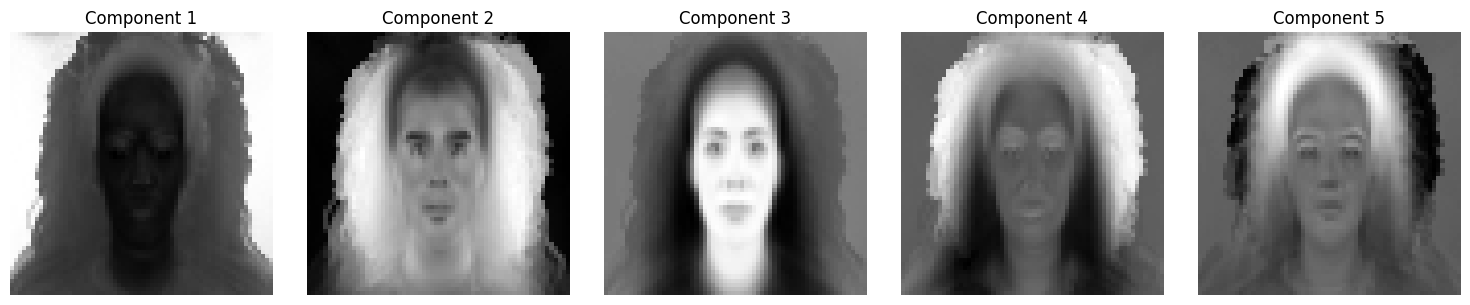

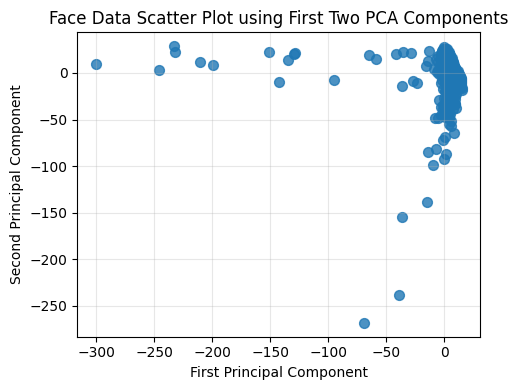

Reconstructing face 0 with different numbers of components...


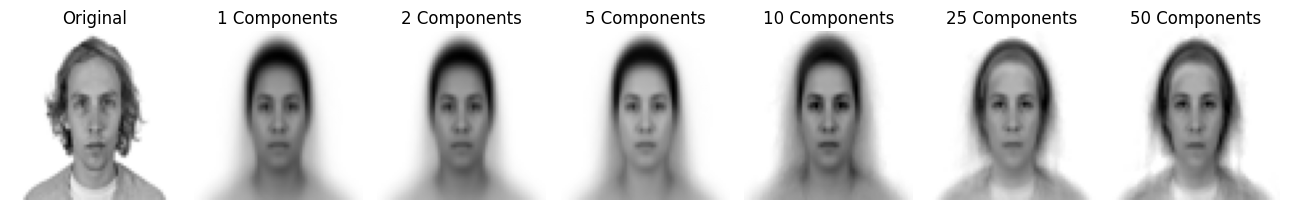

Analysis complete!


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image
from tqdm import tqdm
import glob

# Set up directory path
cfd_dir = '/Users/user/Downloads/CFD Version 3.0/Images/CFD'  # Local folder containing the CFD dataset

def load_and_preprocess_images(image_size=(64, 64)):
    """Load and preprocess neutral face images from the CFD dataset"""
    print("Loading and preprocessing neutral face images from CFD...")
    
    # Find all subfolders in the CFD directory
    subject_folders = [f for f in os.listdir(cfd_dir) if os.path.isdir(os.path.join(cfd_dir, f))]
    
    if not subject_folders:
        print(f"No subfolders found in {cfd_dir}. Please check the dataset structure.")
        return None, None
    
    print(f"Found {len(subject_folders)} subject folders")
    
    neutral_images = []
    subject_ids = []
    
    # Process each subject folder to find neutral pose images
    for folder in tqdm(subject_folders):
        folder_path = os.path.join(cfd_dir, folder)
        
        # Find neutral expression image (ending with -N.jpg)
        neutral_pattern = os.path.join(folder_path, "*-N.jpg")
        neutral_files = glob.glob(neutral_pattern)
        
        if neutral_files:
            # Use the first neutral image found (there should typically be only one)
            neutral_file = neutral_files[0]
            subject_ids.append(folder)
            
            try:
                # Open, convert to grayscale, and resize the image
                img = Image.open(neutral_file).convert('L')
                img = img.resize(image_size)
                
                # Convert to numpy array and flatten
                img_array = np.array(img).flatten() / 255.0  # Normalize to [0, 1]
                neutral_images.append(img_array)
            except Exception as e:
                print(f"Error processing {neutral_file}: {e}")
    
    if not neutral_images:
        print("No valid neutral images found.")
        return None, None
    
    print(f"Successfully loaded {len(neutral_images)} neutral face images")
    
    # Convert list to numpy array
    face_data = np.array(neutral_images)
    
    return face_data, image_size

def perform_pca(face_data, n_components=50):
    """Perform PCA on the face data"""
    print(f"Performing PCA with {n_components} components...")
    
    # Standardize the data
    scaler = StandardScaler()
    face_data_std = scaler.fit_transform(face_data)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    face_pca = pca.fit_transform(face_data_std)
    
    # Calculate explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    print(f"Explained variance by first 5 components: {explained_variance[:5]}")
    print(f"Cumulative explained variance by first 5 components: {cumulative_variance[4]:.4f}")
    
    return pca, face_pca, explained_variance

def plot_pca_components(pca, image_size, n_components=5):
    """Plot the first n principal components as images"""
    components = pca.components_
    
    plt.figure(figsize=(15, 3))
    for i in range(n_components):
        plt.subplot(1, n_components, i+1)
        
        # Reshape component to image dimensions
        component_img = components[i].reshape(image_size)
        
        # Scale to [0, 1] for visualization
        component_img = (component_img - component_img.min()) / (component_img.max() - component_img.min())
        
        plt.imshow(component_img, cmap='gray')
        plt.title(f"Component {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_pca_scatter(face_pca):
    """Plot the face data as a scatter plot of the first 2 PCA components"""
    plt.figure(figsize=(5, 4))
    
    # Create scatter plot
    plt.scatter(face_pca[:, 0], face_pca[:, 1], alpha=0.8, s=50)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Face Data Scatter Plot using First Two PCA Components')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def reconstruct_and_visualize_face(pca, face_data, image_size, face_index=0):
    """Reconstruct a face using different numbers of PCA components and visualize the results"""
    print(f"Reconstructing face {face_index} with different numbers of components...")
    
    # Select a face to reconstruct
    face = face_data[face_index]
    
    # Standardize the face (must use same scaling as in PCA)
    scaler = StandardScaler()
    face_data_std = scaler.fit_transform(face_data)
    face_std = face_data_std[face_index]
    
    # Transform the face to PCA space
    face_pca = pca.transform([face_std])[0]
    
    # Reconstruct with different numbers of components
    components_to_use = [1, 2, 5, 10, 25, 50]
    reconstructions = []
    
    plt.figure(figsize=(2*len(components_to_use) + 1, 8))
    
    # Display original image
    plt.subplot(1, len(components_to_use) + 1, 1)
    original_img = face.reshape(image_size)
    plt.imshow(original_img, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Create and display reconstructions
    for i, n_comp in enumerate(components_to_use):
        # Zero out all but the first n_comp components
        face_pca_reduced = np.copy(face_pca)
        face_pca_reduced[n_comp:] = 0
        
        # Reconstruct the face
        face_reconstructed = pca.inverse_transform(face_pca_reduced)
        
        # Inverse the standardization
        face_reconstructed = scaler.inverse_transform([face_reconstructed])[0]
        
        # Clip values to valid range [0, 1]
        face_reconstructed = np.clip(face_reconstructed, 0, 1)
        
        # Reshape to image dimensions
        img_reconstructed = face_reconstructed.reshape(image_size)
        
        # Display the reconstruction
        plt.subplot(1, len(components_to_use) + 1, i + 2)
        plt.imshow(img_reconstructed, cmap='gray')
        plt.title(f"{n_comp} Components")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()



def main():
    # Step 1: Load and preprocess the neutral face images
    face_data, image_size = load_and_preprocess_images()
    if face_data is None:
        return
    
    # Step 2: Perform PCA
    pca, face_pca, explained_variance = perform_pca(face_data)
    
    # Step 3: Visualize the first 5 PCA components as images
    plot_pca_components(pca, image_size)
    
    # Step 4: Create a scatter plot of the face data using the first 2 components
    plot_pca_scatter(face_pca)

    # Step 5: Reconstruct a face using different numbers of PCA components
    reconstruct_and_visualize_face(pca, face_data, image_size, face_index=0)

    print("Analysis complete!")

if __name__ == "__main__":
    main()

Performing PCA with 50 components...
Explained variance by first 5 components: [0.20177145 0.15154192 0.1345982  0.07624925 0.04172924]
Cumulative explained variance by first 5 components: 0.6059
Reconstructing face 1 with different numbers of components...


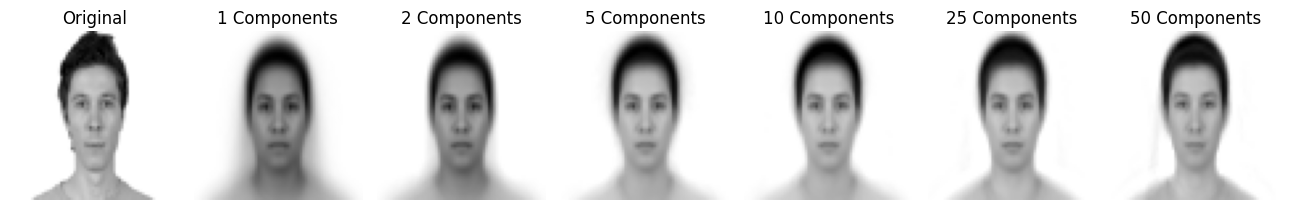

Reconstructing face 2 with different numbers of components...


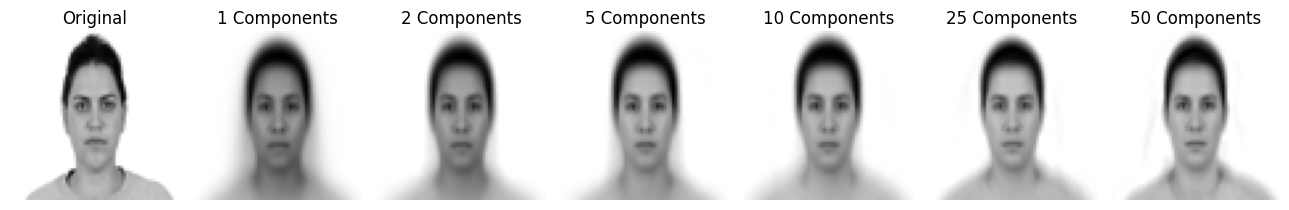

Reconstructing face 3 with different numbers of components...


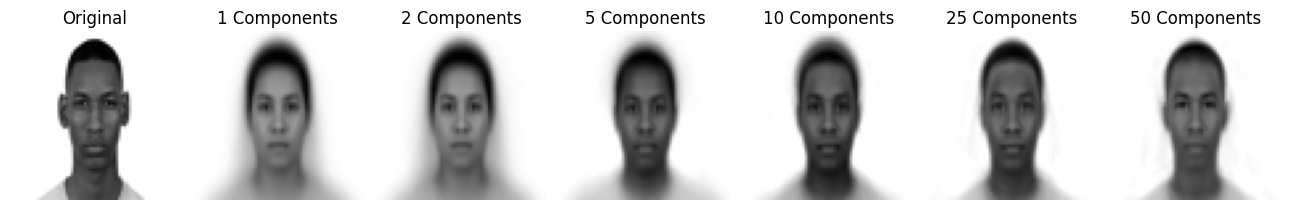

Reconstructing face 4 with different numbers of components...


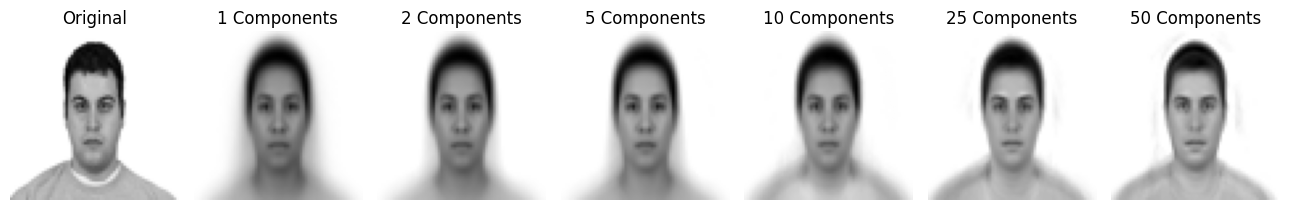

Reconstructing face 5 with different numbers of components...


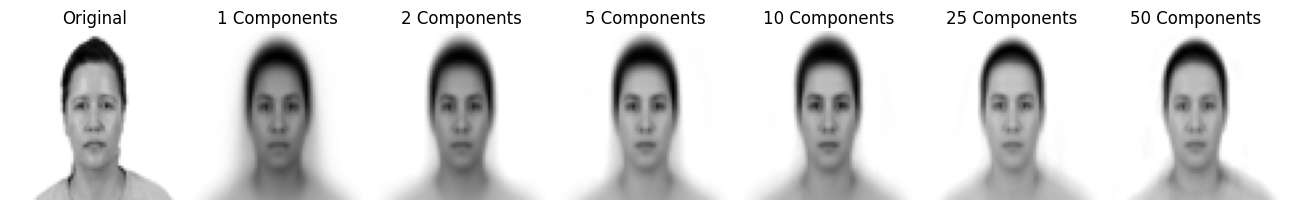

In [45]:
pca, face_pca, explained_variance = perform_pca(face_data)
reconstruct_and_visualize_face(pca, face_data, image_size, face_index=1)
reconstruct_and_visualize_face(pca, face_data, image_size, face_index=2)
reconstruct_and_visualize_face(pca, face_data, image_size, face_index=3)
reconstruct_and_visualize_face(pca, face_data, image_size, face_index=4)
reconstruct_and_visualize_face(pca, face_data, image_size, face_index=5)

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>